<a href="https://colab.research.google.com/github/Aaryant31/Book_Recommendation_system/blob/main/Rahul_Kumar_Soni_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Book Recommendation System </u></b>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Content </b>

The Book-Crossing dataset comprises 3 files.

##**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

##**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

##**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, *expressed* on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0. 

# **Importing libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#creating path of Datasets Available
data_dir='/content/drive/MyDrive/Almabetter/Book Recommender System/DAT/'

In [4]:
#loading Book,User and rating Dataset
books_df=pd.read_csv(data_dir + 'Books.csv')
users_df=pd.read_csv(data_dir + 'Users.csv')
ratings_df=pd.read_csv(data_dir + 'Ratings.csv')


In [5]:
#getting the Shape of All the Dataset
print("books Data:    ", books_df.shape)
print("Users Data:    ", users_df.shape)
print("ratings Data: ", ratings_df.shape)

books Data:     (271360, 8)
Users Data:     (278858, 3)
ratings Data:  (1149780, 3)


# **Data cleaning and pre-processing**

## books_df Data cleaning and pre-processing

In [6]:
#getting the list columns of Book Df
print("Columns: ", list(books_df.columns))
#getting the first 5 Row of book dataset
books_df.head()

Columns:  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
## Drop URL columns
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
## Checking for null values
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

observation:

we have 1 null value for Book-Author column and 2 null value for Publisher column

In [9]:
#getting the row where Book-Author is Null
books_df[books_df['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


observation:

In Row 187689 there is null value for Book-Author


In [10]:
#getting the row where Publisher is Null
books_df[books_df['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


Observation:
In Row 128890 , 129037  there is null value for Book-Author

In [11]:
#filling null value of Book-Author as other
books_df['Book-Author'].fillna('other',inplace=True)

In [12]:
#filling null value of Publisher as other
books_df['Publisher'].fillna('other',inplace=True)

In [13]:
#checkin the null Value Again
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [14]:
## Checking for column Year-of-publication
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

observation:

* Has two text values and one two zero and some books that have future date of publication. 

In [15]:
#checking the Data where 'Year-Of-Publication' == 'DK Publishing Inc'
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


observation:

Here we can see that book-author  and year of publication column are mistyped so we need to correct the column value by interchanging these value.


In [16]:
#checking the Data where 'Year-Of-Publication' == 'Gallimard'
books_df[books_df['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


observation:

Here we can see that book-author and year of publication column are mistyped so we need to correct the column value by interchanging these value.

In [17]:
#correcting the value of year of publication and author by replacing the values


books_df.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[209538 ,'Year-Of-Publication'] = 2000
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books_df.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[221678 ,'Year-Of-Publication'] = 2000
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Boofksf Come to Life (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'James Buckley'

books_df.at[220731 ,'Publisher'] = 'Gallimard'
books_df.at[220731 ,'Year-Of-Publication'] = '2003'
books_df.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books_df.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [18]:
## Converting year of publication in Numbers
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [19]:
from datetime import date
# finding the current year
current_year = date.today().year
print(current_year)

2021


In [20]:
#getting the unique value of year of publication column
print(sorted(list(books_df['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [21]:
# finding books with date of publication greater than current date 
books_df.loc[(books_df['Year-Of-Publication'] > current_year)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books


In [22]:
# First we are filling the nan value where the years are greater than 2021 and 0 then replacing the nan with mean value.
books_df.loc[(books_df['Year-Of-Publication'] > 2021) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with mean value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].mean()), inplace=True)

In [23]:
## Drop duplicate rows
books_df.drop_duplicates(keep='last', inplace=True) 
# resting the index value
books_df.reset_index(drop = True, inplace = True)

In [24]:
#checking info of book_df
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271360 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271360 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.4+ MB


In [25]:
#checking head of book_df
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


## Users_df Data cleaning and Preprocessing

In [26]:
#print the column list of User_df
print("Columns: ", list(users_df.columns))
#geeting the head of User_df
users_df.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [27]:
## Checking null values
print(users_df.isna().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [28]:
## Check for all values present in Age column
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

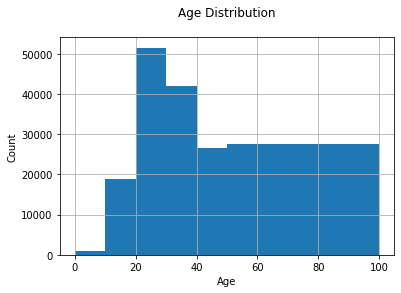

In [29]:
#ploting the Distribution of Age Column
users_df.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [30]:
## Drop duplicate rows
users_df.drop_duplicates(keep='last', inplace=True)
#reseting the index 
users_df.reset_index(drop=True, inplace=True)

In [31]:
#getting the info of User_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [32]:
#viewing head of user_df
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## ratings_df Data cleaning and Preprocessing

In [33]:
#printing the column of Rating_df
print("Columns: ", list(ratings_df.columns))
#getting the head of rating_df
ratings_df.head()

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [34]:
## Checking for null values
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Observation:

No null value in rating_df

In [35]:
## Drop duplicate rows
ratings_df.drop_duplicates(keep='last', inplace=True)
#reseting index
ratings_df.reset_index(drop=True, inplace=True)

In [36]:
#getting infor of Rating Df
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [37]:
#getting the head of Rating df
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [38]:
#first merging book_df and rating_df on 'ISBN' as new Dataframe called Dataset
dataset = pd.merge(books_df, ratings_df, on='ISBN', how='inner')
#again merging dataset dataframe and user_df on User_id
dataset = pd.merge(dataset, users_df, on='User-ID', how='inner')

In [39]:
#getting info of final dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031136 non-null  object 
 3   Year-Of-Publication  1031136 non-null  float64
 4   Publisher            1031136 non-null  object 
 5   User-ID              1031136 non-null  int64  
 6   Book-Rating          1031136 non-null  int64  
 7   Location             1031136 non-null  object 
 8   Age                  753301 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 78.7+ MB


# **Data Visualization**

In [40]:
#Describing title Book Data
books_df['Book-Title'].describe()

count             271360
unique            242135
top       Selected Poems
freq                  27
Name: Book-Title, dtype: object

Text(0.5, 1.0, 'No of books by an author (Top 15)')

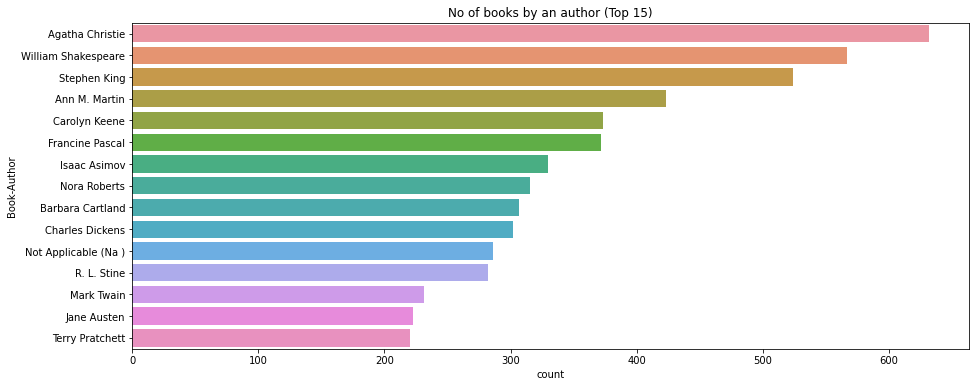

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books_df,order=books_df['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

In [42]:
#Describing title Book Data
books_df['Book-Author'].describe()

count              271360
unique             102024
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

observation:

* We have 242135 unique Book Title.
* we have total 102024 unique Authors
* The author with most no of books is Agatha Christie with almost 632 books


In [43]:
#Describing title Book Data
books_df['Publisher'].describe()

count        271360
unique        16805
top       Harlequin
freq           7535
Name: Publisher, dtype: object

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

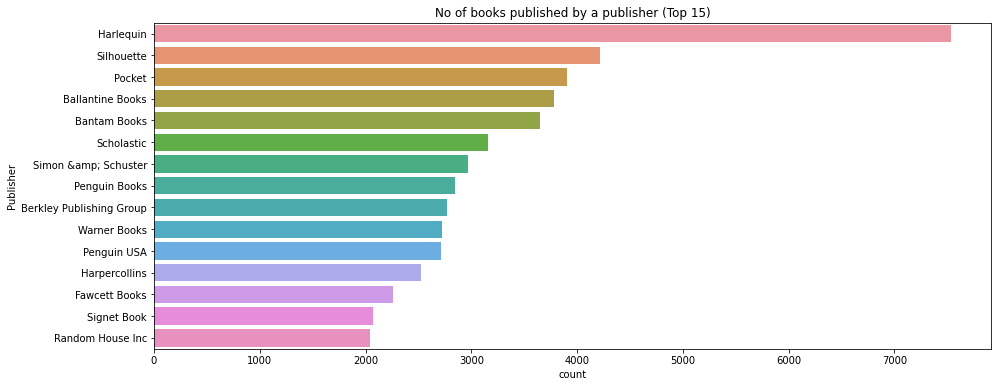

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books_df,order=books_df['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

observation:

* we have total 16805 Unique "Publisher"
* Publisher "Harlequin" has published most no of books almost 7535

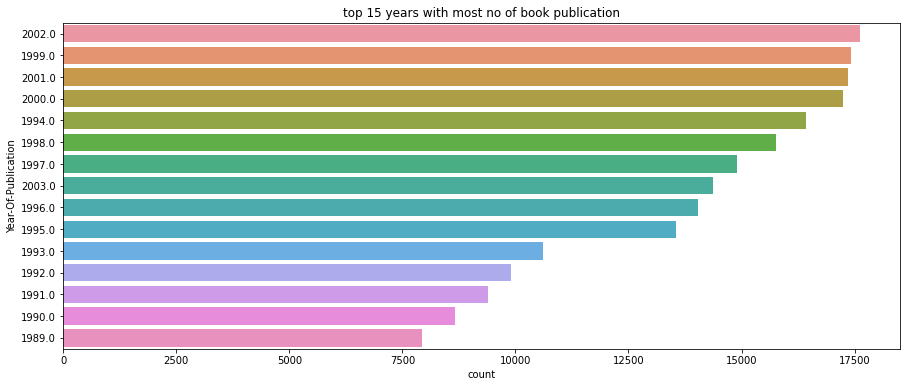

In [45]:
# plot for most no of books publised in a year
plt.figure(figsize=(15,6))
sns.countplot(y="Year-Of-Publication", data=books_df,order=books_df['Year-Of-Publication'].value_counts().index[:15])
plt.title('top 15 years with most no of book publication')
plt.show()

observation:
* Most of the books are published between 1999 and 2002

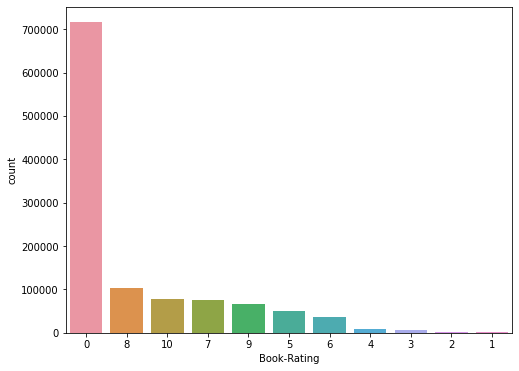

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings_df,order=ratings_df['Book-Rating'].value_counts().index[:])

observation:
 Large no. of books are not rated or rated as 0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

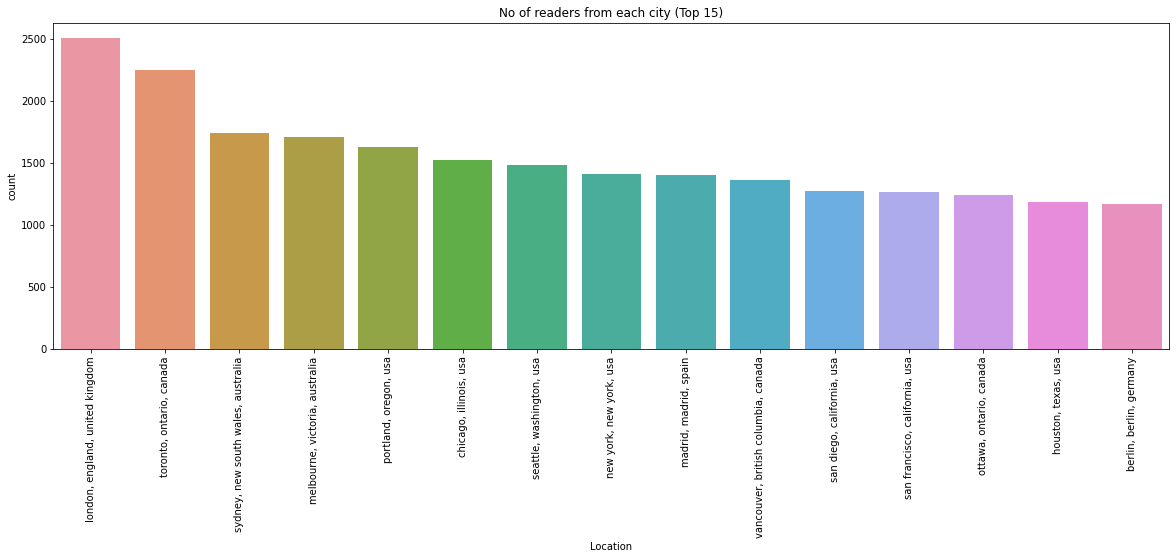

In [47]:
#ploting the location count
plt.figure(figsize=(20,6))
sns.countplot(x="Location", data=users_df,order=users_df['Location'].value_counts().index[0:15])
plt.title("No of readers from each city (Top 15)")
plt.xticks(rotation=90)

Obeservation:

we can see that for location london,england,united kingdaon has highgest no of readers

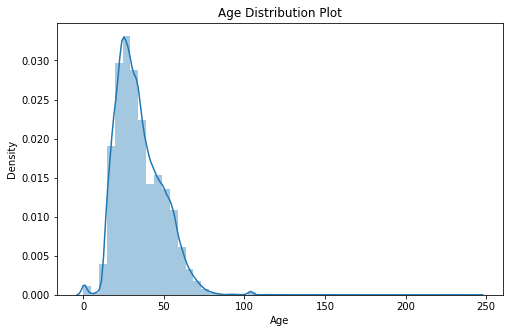

In [48]:
#ploting Distribution polt for age column
plt.figure(figsize=(8, 5))
sns.distplot(users_df.Age)
plt.title('Age Distribution Plot')
plt.show()

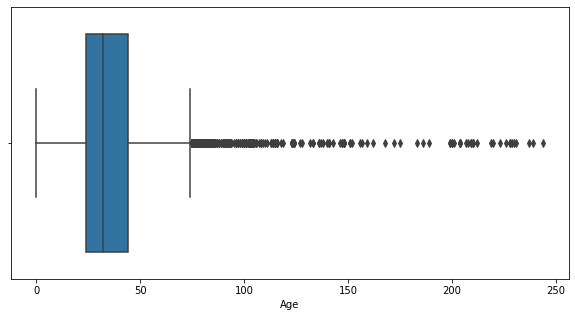

In [49]:
# Checking the Outliers in Age.
plt.figure(figsize = (10,5))
sns.boxplot(users_df.Age)
plt.xlabel('Age')
plt.show()

**handling outlier**

In [50]:
# First we are filling the nan value where the age is greater than 90 and less than 8 then replacing the nan with mean value.
users_df.loc[(users_df['Age'] > 90) | (users_df['Age'] < 8), 'Age']= np.NAN
users_df['Age']= users_df['Age'].fillna(users_df['Age'].mean())
users_df['Age']= users_df['Age'].astype(np.int32)

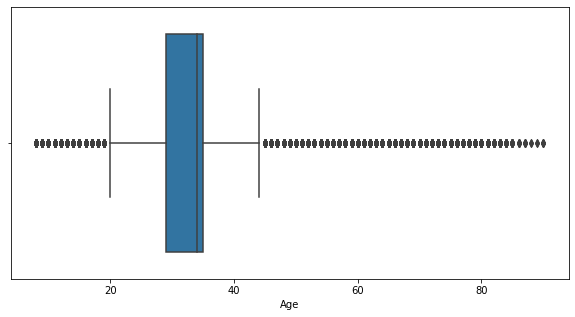

In [51]:
plt.figure(figsize = (10,5))
sns.boxplot(users_df.Age)
plt.xlabel('Age')
plt.show()

In [52]:
books_df['Year-Of-Publication'].describe()

count    271360.000000
mean       1993.693241
std           8.249980
min        1376.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

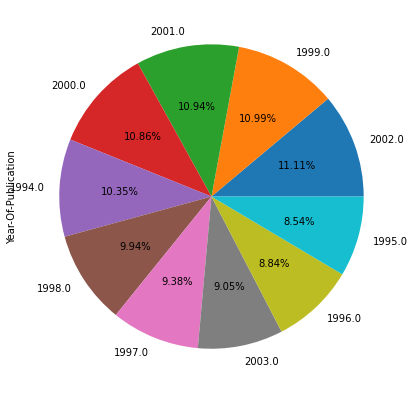

In [53]:
fig= plt.figure(figsize=(15,7))
books_df['Year-Of-Publication'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%')
plt.show()

**observation**

Most of the book published on 2002

# **Collaborative Filtering**

Collaborative filtering (CF) is a technique used by recommender systems.In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).

In [54]:
#viewing top 5 row of user Data
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


## **Collaborative Filtering Using k-Nearest Neighbors (kNN)**

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user.

First, we need to find out the average rating, and the number of ratings each book received.

In [55]:
#creating Dataframe to find the average rating of each book grouping by ISBN number
average_rating = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False)

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


observation
* In this data set, the book that received most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

##**Note**
**To ensure statistical significance, We will consider only those books in which atleast 50 ratings have been given by the users and users who have given atleast 50 ratings**

In [56]:
counts = ratings_df['Book-Rating'].value_counts()
ratings_df = ratings_df[ratings_df['Book-Rating'].isin(counts[counts >= 50].index)]
counts1 = ratings_df['User-ID'].value_counts()
ratings_df = ratings_df[ratings_df['User-ID'].isin(counts1[counts1 >= 50].index)]


Merging the two dataset (ratings data and books data.)

In [57]:
#merging both DF on ISBN number
combine_book_rating = pd.merge(ratings_df, books_df, on='ISBN')
#columns = ['Year-Of-Publication', 'Publisher', 'Book-Author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
#droping extra columns
#combine_book_rating = combine_book_rating.drop(columns, axis=1)
#viewing top 20 row of merged DF
combine_book_rating.head(20)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
5,9177,0446364193,7,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
7,11676,0446364193,8,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
9,15418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books


In [58]:
#droping columns where Book title is Null
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

We then group by book titles and create a new column for total rating count.

In [59]:
book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'TotalRatingCount'})
     [['Book-Title', 'TotalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [60]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,TotalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,198


In [61]:
#describing the new data
rating_with_totalRatingCount['TotalRatingCount'].describe()

count    703434.000000
mean         35.008956
std          68.959965
min           1.000000
25%           2.000000
50%           8.000000
75%          34.000000
max         852.000000
Name: TotalRatingCount, dtype: float64

In [62]:
# Converting the values into float data type.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# It provides the descriptive statistcs of the data.
print(book_ratingCount['TotalRatingCount'].describe())

count   199187.00
mean         3.53
std         10.54
min          1.00
25%          1.00
50%          1.00
75%          3.00
max        852.00
Name: TotalRatingCount, dtype: float64


observation
* The median book has been rated only once. 

Let’s look at from 90% to 99% to identify the TotalRatingCounts for each of the quantile.

In [63]:
print(book_ratingCount['TotalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90    6.00
0.91    7.00
0.92    7.00
0.93    8.00
0.94    9.00
0.95   11.00
0.96   13.00
0.97   17.00
0.98   23.00
0.99   39.00
Name: TotalRatingCount, dtype: float64


observation
* We can see about 99% of books received below 31 ratings.
* Only about 1% of books recieved 31 or more ratings.

As we have so many books in our data, we will limit to above 30 ratings only.

In [64]:
# Limiting TotalRatingCount above 30 ratings.
popularity_threshold = 30
rating_popular_book = rating_with_totalRatingCount.query('TotalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,TotalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198


In [65]:
# Checking the total size of rating_popular_book.
rating_popular_book.shape

(192670, 8)

Check the number of unique books with respect to the ISBN

In [66]:
rating_popular_book['ISBN'].nunique()

7653

# **Filter to users in US**

In order to improve computing speed, and not run into the 'MemoryError' issue we will limit our users data to those in the US. Then combine the user data with rating data and total rating count data.

In [67]:
combined = rating_popular_book.merge(users_df, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

us_user_rating = combined[combined['Location'].str.contains("usa")]
us_user_rating=us_user_rating.drop('Age', axis=1)
us_user_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,TotalRatingCount,Location
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"omaha, nebraska, usa"
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"sunnyvale, california, usa"
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"los angeles, california, usa"
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"providence, rhode island, usa"
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"mechanicsville, maryland, usa"
...,...,...,...,...,...,...,...,...,...
192665,275970,051756338X,0,Sarum: The Novel of England,Edward Rutherfurd,1987.00,Random House Inc,45,"pittsburgh, pennsylvania, usa"
192666,275970,0865714215,0,Stormy Weather,Guy Dauncey,2001.00,New Society Publishers,59,"pittsburgh, pennsylvania, usa"
192667,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001.00,Time Warner Audio Major,257,"pittsburgh, pennsylvania, usa"
192668,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995.00,Random House Value Pub,30,"fort lee, new jersey, usa"


Remove the duplicates present in rating popular book data.

In [68]:
if not rating_popular_book[rating_popular_book.duplicated(['User-ID', 'Book-Title'])].empty:

    # Identifying number of rows corresponding to the US.
    print('Actual rating_popular_book shape {0}'.format(rating_popular_book.shape))

    rating_popular_book = rating_popular_book.drop_duplicates(['User-ID', 'Book-Title'])

    # Identifying number of rows corresponding to the US duplicates.
    print('Rating_popular_book shape after removing the duplicates  {0}'.format(rating_popular_book.shape))

Actual rating_popular_book shape (192670, 8)
Rating_popular_book shape after removing the duplicates  (189333, 8)


# **Implementing kNN**

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “auto”, and we specify “metric=minkowski”. Finally, we fit the model.

At first create a pivote table.

In [69]:
#creating Pivot Table
from scipy.sparse import csr_matrix
us_user_rating_pivot = rating_popular_book.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_user_rating_matrix = csr_matrix(us_user_rating_pivot.values)

**Finding the Nearest Neighbors**

In [70]:
#importing KNN 
from sklearn.neighbors import NearestNeighbors
#creating instance of KNN
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
#Fitting KNN
model_knn.fit(us_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

**Test our model and make few recommendation**

In [71]:
query_index = np.random.choice(us_user_rating_pivot.shape[0])
print(query_index)


147


In [72]:
distances, indices = model_knn.kneighbors(us_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [73]:
us_user_rating_pivot.index[query_index]

'All He Ever Wanted'

In [74]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for All He Ever Wanted:

1: Sea Glass: A Novel, with distance of 0.6893473493118667:
2: The Last Time They Met : A Novel, with distance of 0.7497396755303362:
3: Windy City Blues (V.I. Warshawski Novels (Paperback)), with distance of 0.7712071195436653:
4: Before Women Had Wings (Ballantine Reader's Circle), with distance of 0.7881653945968369:
5: The Fiery Cross, with distance of 0.7922577482627976:


**We are only considering those ratings that are not eqaul to 0.**

In [75]:
#shape of US based User
us_user_rating.shape

(151815, 9)

In [76]:
# Ratings that are not 0.
us_user_rating= us_user_rating[us_user_rating['Book-Rating'] != 0]

In [77]:
us_user_rating.shape

(42020, 9)

In [78]:
us_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,TotalRatingCount,Location
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"mechanicsville, maryland, usa"
12,18082,0446364193,7,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"southern, california, usa"
13,19085,0446364193,8,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"menomonie, wisconsin, usa"
14,21031,0446364193,10,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"alexandria, virginia, usa"
18,28177,0446364193,7,Along Came a Spider (Alex Cross Novels),James Patterson,1993.00,Warner Books,198,"grand rapids, michigan, usa"


# **Filtering users with atleast 10 interaction**

In [79]:
users_interactions_count_df = us_user_rating.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 10].reset_index()[['User-ID']]
print('Number of users with at least 10 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 2022
Number of users with at least 10 interactions: 1310


In [80]:
print('Number of interactions: %d' % len(us_user_rating))
interactions_from_selected_users_df = us_user_rating.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

Number of interactions: 42020
Number of interactions from users with at least 10 interactions: 38473


In [81]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,TotalRatingCount,Location
0,243,0446606383,6,The Midnight Club,James Patterson,1999.00,Warner Vision,73,"arden hills, minnesota, usa"
1,243,0316776963,9,Me Talk Pretty One Day,David Sedaris,2001.00,Back Bay Books,257,"arden hills, minnesota, usa"
2,243,0375400117,10,Memoirs of a Geisha,Arthur Golden,1997.00,Alfred A. Knopf,47,"arden hills, minnesota, usa"
3,243,0449006522,6,Manhattan Hunt Club,JOHN SAUL,2002.00,Ballantine Books,58,"arden hills, minnesota, usa"
4,243,0316601950,9,The Pilot's Wife : A Novel,Anita Shreve,1999.00,Back Bay Books,290,"arden hills, minnesota, usa"
5,243,044023722X,7,A Painted House,John Grisham,2001.00,Dell Publishing Company,390,"arden hills, minnesota, usa"
6,243,0446364800,9,The General's Daughter,Nelson DeMille,1993.00,Warner Books,104,"arden hills, minnesota, usa"
7,243,0316899984,7,"River, Cross My Heart",Breena Clarke,1999.00,Little Brown &amp; Company,125,"arden hills, minnesota, usa"
8,243,0060915544,10,The Bean Trees,Barbara Kingsolver,1989.00,Perennial,208,"arden hills, minnesota, usa"
9,243,0060977493,7,The God of Small Things,Arundhati Roy,1998.00,Perennial,153,"arden hills, minnesota, usa"


## **We are applying log transformation to smooth the distribution!!**

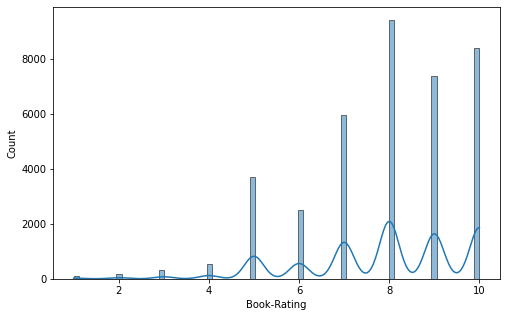

In [82]:
# Before log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [83]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 38473


,ISBN,User-ID,Book-Rating
0,0020198906,7346,3.17
1,0020198906,14422,3.32
2,0020198906,108352,3.00
3,0020198906,140036,3.17
4,0020198906,157273,3.17


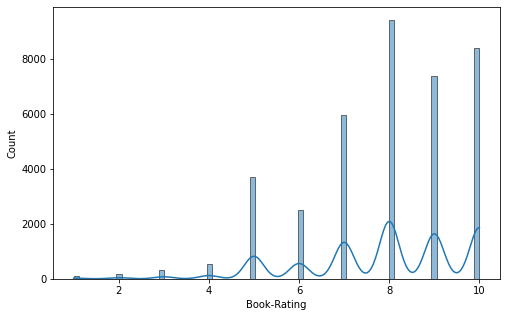

In [84]:
# After log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

# **Splitting data into Train And Test Dataset**

In [85]:
from sklearn.model_selection import train_test_split

interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('Number interactions on Train set: %d' % len(interactions_train_df))
print('Number interactions on Test set: %d' % len(interactions_test_df))

Number interactions on Train set: 30778
Number interactions on Test set: 7695


In [86]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
22522,0449912558,2891,3.32
32046,0671759345,147847,3.32
29954,0670865796,251140,3.00
19007,0440498058,76168,3.32
23228,0451173317,55490,3.46


In [87]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0020198906,002026478X,0020412401,0020442203,0020442408,0020442505,0020442602,002542730X,0027701301,0028604199,0028604202,0030615534,0060001453,0060001941,006000438X,0060008024,0060008032,0060008245,0060008296,0060008776,0060009241,0060011173,006001203X,0060013117,0060013125,0060080841,0060083948,0060085444,0060085452,0060086246,0060086386,0060089539,0060090367,0060090375,0060090383,0060092572,0060092645,0060093595,0060095628,0060096195,...,1575667614,1576736083,1576737330,1578150450,157815054X,1586210661,1586212230,1586214055,1586214497,1586215027,1586215981,1587882337,1587883643,1587887789,1590071352,1590580362,1590863518,1590864670,1592400876,1593551649,1594140979,1841954608,1842322761,1860462588,1878424319,1878448900,1882723007,1885171080,1895565669,1896095011,1896860982,1898901147,1930252250,1931056323,193156146X,1931561648,555053150X,9500704447,B0000T6KHI,B0001GMSV2
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
243,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
254,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
507,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
638,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
882,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [88]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
# Check the list of user id of the users
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[243, 254, 507, 638, 882, 1435, 1733, 1848, 2033, 2110]

# **SVD - Model Based Collaborative Filtering**

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides another way to factorize a matrix, into singular vectors and singular values.

# **A=U.Sigma.VT**

In [90]:
#importing cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [91]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [92]:
users_items_pivot_matrix.shape

(1310, 5025)

In [93]:
U.shape

(1310, 15)

In [94]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [95]:
Vt.shape

(15, 5025)

**After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.**

In [96]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.91190667e-02,  2.26021928e-02,  1.01822675e-03, ...,
         2.87086985e-03,  1.56326301e-02, -2.97755473e-04],
       [ 5.21664643e-03,  1.13783671e-02,  7.50119278e-03, ...,
         8.90930668e-03, -1.64022879e-02,  1.94177767e-03],
       [ 6.46062370e-03, -2.33151808e-02,  3.56524970e-04, ...,
        -8.80802917e-04,  3.81536971e-03,  5.11459951e-05],
       ...,
       [ 3.30463341e-02, -1.97329475e-02,  6.73288850e-04, ...,
        -9.48356969e-03, -1.49806243e-02,  1.77394962e-04],
       [ 4.61456533e-03,  5.38652349e-02,  4.38433014e-03, ...,
         2.30263565e-02,  4.62369888e-02, -1.40004446e-03],
       [ 3.54610025e-03,  1.93427821e-02,  2.35286560e-03, ...,
        -3.85122630e-04,  5.09639620e-03,  2.39864772e-04]])

In [97]:
all_user_predicted_ratings.shape

(1310, 5025)

**Making DataFrame from our predicted ratings.**

In [98]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,243,254,507,638,882,1435,1733,1848,2033,2110,2276,2766,2891,2977,3145,3167,3363,3371,3373,3827,4017,4938,5539,5582,6073,6251,6323,6543,6563,6575,7125,7158,7283,7346,7915,8066,8067,8245,8253,8362,...,269835,269890,270352,270605,270801,270820,270838,270906,271144,271176,271195,271448,271538,271558,271705,272573,273086,273113,273979,274056,274061,274308,274549,274634,274808,275970,276050,276165,276231,276463,276680,277427,277639,278026,278137,278188,278418,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0020198906,0.02,0.01,0.01,0.00,0.00,0.01,0.00,-0.00,0.01,0.01,0.03,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.03,-0.00,0.00,0.02,0.01,0.05,0.00,0.06,0.04,0.13,0.01,0.00,0.02,0.19,0.05,0.02,0.09,0.02,0.04,0.01,...,-0.00,0.01,-0.00,0.02,0.02,0.01,-0.00,0.00,0.00,0.01,0.01,0.05,0.01,0.02,0.02,0.04,0.01,-0.01,0.02,0.01,-0.02,0.02,0.01,-0.00,0.01,0.01,0.01,0.01,0.02,0.01,0.00,0.03,0.01,0.02,0.00,0.01,0.00,0.03,0.00,0.00
002026478X,0.02,0.01,-0.02,-0.04,0.01,0.02,-0.01,-0.02,0.02,-0.02,-0.01,0.02,0.02,-0.01,-0.01,0.06,0.04,0.01,0.02,-0.00,0.13,0.02,0.01,-0.01,-0.01,-0.02,-0.02,-0.02,0.00,-0.11,0.02,0.01,0.06,0.17,0.01,0.01,0.07,0.02,0.11,0.02,...,-0.01,-0.01,0.00,0.04,-0.01,-0.03,0.02,-0.01,0.05,-0.05,-0.03,-0.00,0.01,-0.01,0.06,0.02,0.03,0.00,0.10,0.03,0.04,-0.02,-0.01,-0.01,0.03,0.01,0.01,-0.03,0.06,0.00,0.00,0.07,0.01,0.02,-0.02,0.01,0.02,-0.02,0.05,0.02
0020412401,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,-0.01,-0.00,0.00,0.00,0.01,0.00,0.00,0.00,-0.00,0.01,0.00,...,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.01,-0.00,0.01,0.00,-0.00,0.00,0.01,-0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0020442203,-0.00,0.07,-0.00,0.01,0.01,0.00,0.01,0.01,0.06,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,-0.01,0.01,0.00,0.01,0.01,0.07,0.01,-0.00,0.01,-0.01,-0.01,-0.00,0.00,0.02,-0.00,-0.00,-0.01,0.01,0.02,0.00,...,0.01,0.00,0.00,0.01,-0.00,0.01,0.00,0.00,0.01,0.09,0.02,0.01,0.01,0.01,0.03,0.01,0.01,-0.03,0.00,0.01,0.05,0.01,0.00,0.01,0.00,0.01,0.01,0.08,0.00,0.01,0.00,0.00,0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.02
0020442408,0.00,0.02,-0.00,-0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,-0.00,0.00,0.00,0.00,0.01,-0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01,-0.00,0.01,-0.01,-0.00,-0.00,0.01,0.02,-0.01,0.00,-0.02,0.01,0.01,0.00,...,0.00,0.00,0.00,0.01,-0.00,0.02,0.01,0.00,0.01,0.01,0.02,-0.01,0.01,0.02,0.02,0.01,0.01,-0.03,0.01,0.01,0.04,0.02,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.00,-0.00,0.01,0.01,-0.00,0.00,0.00,0.00,-0.01,-0.00,0.01


In [99]:
len(cf_preds_df.columns)

1310

In [100]:
global books_df
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.00,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.00,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.00,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.00,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.00,W. W. Norton &amp; Company


### **Colaborative Filtering Recommender Class**

In [101]:
import random

In [102]:
# creating class for collaborative Filtering
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books_df,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

# **Evaluation**

### In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### This evaluation method works as follows:

* ### For each user
    * ### For each item the user has interacted in test set
        * ### Sample 100 other items the user has never interacted.   
        * ### Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * ### Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ### Aggregate the global Top-N accuracy metrics

In [103]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [104]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [105]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

In [106]:
#printing the interaction's index no.
print(list(interactions_full_indexed_df.index.values))

[7346, 14422, 108352, 140036, 157273, 68943, 95359, 104113, 248718, 264947, 271448, 190708, 16634, 55492, 96448, 114414, 122429, 173291, 197687, 203240, 228998, 16634, 38023, 66878, 126736, 38023, 93363, 228021, 16634, 88733, 228021, 243294, 257028, 10030, 12538, 16996, 41084, 52584, 71712, 110934, 113270, 128835, 150979, 171602, 173291, 174216, 175117, 179734, 183995, 208671, 225763, 229741, 269566, 277427, 12538, 123257, 130554, 7346, 52584, 150979, 155147, 249894, 23571, 52584, 113904, 125519, 128835, 196160, 249894, 251843, 172742, 37208, 98391, 107784, 176214, 261998, 269321, 193676, 4017, 6575, 8454, 10560, 17003, 89602, 104113, 115435, 201042, 224349, 259626, 29526, 44845, 93426, 135149, 142715, 165308, 205980, 227836, 265115, 271705, 98391, 27472, 261829, 98391, 174216, 229011, 254377, 258185, 265115, 203799, 13552, 16795, 31315, 61854, 131046, 235282, 242106, 93047, 94951, 98391, 114988, 271558, 254899, 123790, 169233, 202277, 216466, 249894, 40415, 69378, 124487, 187574, 2147

In [107]:
#taking user input for recommendation
#user=int(input("Enter User ID from above list for book recommendation:  "))
#lets take user input  =110934
user=110934 
model_recommender.recommend_book(cf_recommender_model,user)

Recommendation for User-ID =  110934
         ISBN                                         Book-Title  recStrength
0  0590353403     Harry Potter and the Sorcerer's Stone (Book 1)         2.92
1  043935806X  Harry Potter and the Order of the Phoenix (Boo...         2.25
2  0312966091  Three To Get Deadly : A Stephanie Plum Novel (...         2.15
3  0312971346                 High Five (A Stephanie Plum Novel)         2.07
4  059035342X  Harry Potter and the Sorcerer's Stone (Harry P...         1.29
5  0312195516                The Red Tent (Bestselling Backlist)         1.24
6  0553280341  B Is for Burglar (Kinsey Millhone Mysteries (P...         1.13
7  0312265867               To the Nines: A Stephanie Plum Novel         1.06
8  014028009X                              Bridget Jones's Diary         1.03
9  0142001740                            The Secret Life of Bees         1.01


In [108]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        recall_at_15 = hits_at_15_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [109]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1309 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.310461338531514, 'recall@10': 0.41962313190383366, 'recall@15': 0.5073424301494477}


,hits@5_count,hits@10_count,hits@15_count,interacted_count,recall@5,recall@10,recall@15,User-ID
58,20,26,30,63,0.32,0.41,0.48,16795
68,18,26,29,61,0.30,0.43,0.48,98391
138,19,32,32,59,0.32,0.54,0.54,153662
72,28,33,39,52,0.54,0.63,0.75,114368
69,25,27,29,51,0.49,0.53,0.57,104636
38,7,11,12,50,0.14,0.22,0.24,95359
55,6,18,21,43,0.14,0.42,0.49,158295
115,7,11,14,35,0.20,0.31,0.40,60244
264,22,26,29,35,0.63,0.74,0.83,123883
189,5,6,11,33,0.15,0.18,0.33,31315


# **Conclusion**

As we can see, after implementing Collaborative Filtering and evaluating it using SVD matrix we are satisfied with the results. A recall rate of around 50 for hit@15 is fair enough for such a large dataset. Also since it is an unsupervised learning algorithm trying to find good books that users will likes which in itself is a very vast and complicated study.


